In [1]:
import Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Turing")
Pkg.add("Distributions")
Pkg.add("StatsPlots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [=======>                                 ]  15.8 %>                            ]  28.6 % [=================>                       ]  41.6 %                ]  59.0 % [=============================>           ]  72.0 %>   ]  91.1 % Resolving package versions...
 Installed LoggingExtras ──────────────── v0.4.0
 Installed LeftChildRightSiblingTrees ─── v0.1.2
 Installed Tables ─────────────────────── v1.0.3
 Installed LazyArrays ─────────────────── v0.15.0
 Installed ChainRulesCore ─────────────── v0.7.1
 Installed NNlib ──────────────────────── v0.6.6
 Installed Contour ────────────────────── v0.5.2
 Installed OrdinaryDiffEq ─────────────── v5.30.0
 Installed OpenBLAS_jll ───────────────── v0.3.7+7
 Installed OpenSpecFun_jll ────────────── v0.5.3+3
 Installed WoodburyMatrices ───────────── v0

  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


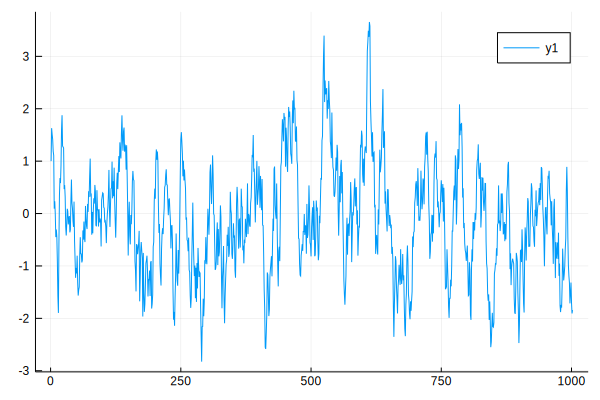

In [2]:
using DifferentialEquations
using Plots

μ = 0.0
σ = sqrt(2)
Θ = 1.0
W = OrnsteinUhlenbeckProcess(Θ,μ,σ,0.0,1.0)
prob = NoiseProblem(W,(0.0,100.0))
sol = solve(prob;dt=0.1)
plot(sol.u)

In [3]:
using Turing
using Distributions

@model ou(r,delta_t=0.1) = begin
    T = length(r)
    ampl ~ Uniform(0.0,5.0)
    tau ~ Uniform(0.0,5.0)
    
    b = exp(-delta_t/tau)
    
    r[1] ~ Normal(0,sqrt(ampl))
    for i=2:T
        r[i] ~ Normal(r[i-1]*b,sqrt(ampl*(1-b^2)))
    end
end

┌ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1273


  Building Libtask → `~/.julia/packages/Libtask/K7OAU/deps/build.log`


(::DynamicPPL.ModelGen{(:r, :delta_t),var"###ou#471",NamedTuple{(:delta_t,),Tuple{Float64}}}) (generic function with 1 method)

In [6]:
using StatsPlots

chn = sample(ou(sol.u,0.1), NUTS(0.8), 2000)

# Summarise results (currently requires the master branch from MCMCChains)
describe(chn)



┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/hstrey/.julia/packages/Turing/vg86q/src/inference/hmc.jl:555
Sampling  20%|██████▍                        |  ETA: 0:00:01
  iteration:                     408
  n_steps:                       11
  is_accept:                     true
  acceptance_rate:               0.9902069210094692
  log_density:                   -617.7421524371656
  hamiltonian_energy:            618.2137977644252
  hamiltonian_energy_error:      0.02289319814155988
  max_hamiltonian_energy_error:  -0.03537882247201196
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.12286903888650047
  nom_step_size:                 0.12286903888650047
4m  mass_matrix:                   DiagEuclideanMetric([0.09472521506739527, 0.095 ...])












Sampling  41%|████████████▉                  |  ETA: 0:00:01
  iteration:                     829
  n_steps:                       15
  is_accept:      

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean    │ std      │ naive_se   │ mcse      │ ess     │
│     │ Symbol     │ Float64 │ Float64  │ Float64    │ Float64   │ Any     │
├─────┼────────────┼─────────┼──────────┼────────────┼───────────┼─────────┤
│ 1   │ ampl       │ 1.22096 │ 0.219627 │ 0.00694523 │ 0.0135232 │ 203.6   │
│ 2   │ tau        │ 1.11709 │ 0.212629 │ 0.00672392 │ 0.012679  │ 198.872 │

Quantiles

│ Row │ parameters │ 2.5%     │ 25.0%    │ 50.0%   │ 75.0%   │ 97.5%   │
│     │ Symbol     │ Float64  │ Float64  │ Float64 │ Float64 │ Float64 │
├─────┼────────────┼──────────┼──────────┼─────────┼─────────┼─────────┤
│ 1   │ ampl       │ 0.915147 │ 1.06072  │ 1.17852 │ 1.33657 │ 1.74059 │
│ 2   │ tau        │ 0.818497 │ 0.963507 │ 1.0742  │ 1.22745 │ 1.6527  │


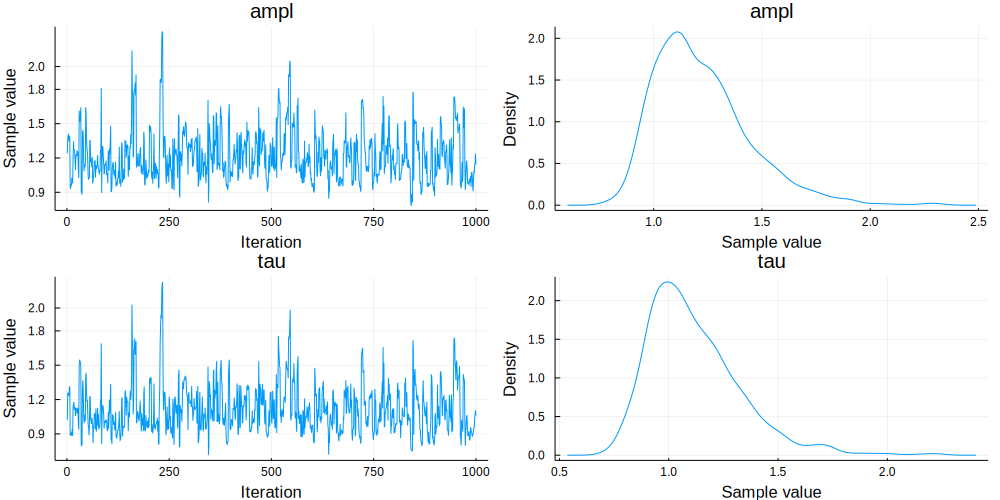

In [7]:
# Plot and save results
p = plot(chn)